In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

%reload_ext autoreload
%autoreload 2
from HelperFunctions import plot_corr, minibatch, subcategoryttest, subcategoryANOVA

In [2]:
df=pd.read_csv('lean_df_3.csv',index_col='id')

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_number = df.select_dtypes(include = 'number')
df_object = df.select_dtypes(include = 'object')
df_category = df.select_dtypes(include = 'category')
df_boolean = df.select_dtypes(include = 'bool')
df_datetime = df.select_dtypes(include = 'datetime')
df_timedelta = df.select_dtypes(include = 'timedelta')
#######################################################
nominal_var=list(df_object.columns)
ordinal_var=list(df_number.columns)
continuous_var=list(df_number.columns)
time_var=list(df_datetime.columns)

In [4]:
df.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_act_il,open_il_12m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,open_revol_frac,good_acc_frac,fully_invested
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,Aug-2003,1.0,30.0,NaN,0.0,29.7,13.0,w,0.00,4421.723917,3600.00,821.72,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,2.0,0.0,21.0,36.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,0.0,0.0,148.0,128.0,3.0,3.0,4.0,4.0,2.0,2.0,0.0,0.0,3.0,76.9,0.0,0.0,178050.0,13734.0,677.0,0.692308,0.230769,0.076923,0.555556,0.400000,0.444444,0.444444,0.538462,True
68355089,24700.0,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,577xx,SD,16.06,1.0,Dec-1999,4.0,6.0,NaN,0.0,19.2,38.0,w,0.00,25679.660000,24700.00,979.66,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,1.0,0.0,19.0,73.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,0.0,0.0,113.0,192.0,2.0,2.0,2.0,0.0,0.0,13.0,0.0,0.0,2.0,97.4,0.0,0.0,314017.0,24667.0,717.0,0.710526,0.157895,0.105263,0.629630,0.294118,0.185185,0.740741,0.578947,True
68341763,20000.0,60 months,10.78,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,605xx,IL,10.78,0.0,Aug-2000,0.0,NaN,NaN,0.0,56.2,18.0,w,0.00,22705.924294,20000.00,2705.92,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,0.0,NaN,Joint App,71000.0,13.85,Not Verified,0.0,0.0,1.0,0.0,19.0,73.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,0.0,0.0,125.0,184.0,14.0,14.0,101.0,10.0,0.0,2.0,0.0,0.0,0.0,100.0,0.0,0.0,218418.0,14877.0,697.0,0.388889,0.333333,0.277778,0.571429,0.500000,0.428571,0.571429,0.333333,True
66310712,35000.0,60 months,14.85,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,076xx,NJ,17.06,0.0,Sep-2008,0.0,NaN,NaN,0.0,11.6,17.0,w,15897.65,31464.010000,19102.35,12361.66,0.0,0.0,Feb-2019,829.90,Apr-2019,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,1.0,0.0,23.0,70.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,0.0,0.0,36.0,87.0,2.0,2.0,2.0,NaN,0.0,8.0,0.0,0.0,1.0,100.0,0.0,0.0,381215.0,18000.0,787.0,0.764706,0.117647,0.058824,0.769231,0.400000,0.384615,0.769231,0.764706,True
68476807,10400.0,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,174xx,PA,25.37,1.0,Jun-1998,3.0,12.0,NaN,0.0,64.5,35.0,w,0.00,11740.500000,10400.00,1340.50,0.0,0.0,Jul-2016,10128.96,NaN,Mar-2018,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,3.0,0.0,14.0,84.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,0.0,0.0,128.0,210.0,4.0,4.0,4.0,1.0,0.0,5.0,0.0,0.0,4.0,96.6,0.0,0.0,439570.0,88097.0,697.0,0.542857,0.285714,0.171429,0.473684,0.444444,0.315789,0.368421,0.342857,True
68426831,11950.0,36 months,13.44,C,C3,Veterinary Tecnician,4 years,RENT,340

In [5]:
df.loc[:,['issue_d','loan_status','last_pymnt_d','next_pymnt_d']].iloc[0:50,:]

,issue_d,loan_status,last_pymnt_d,next_pymnt_d
id,,,,
68407277,Dec-2015,Fully Paid,Jan-2019,NaN
68355089,Dec-2015,Fully Paid,Jun-2016,NaN
68341763,Dec-2015,Fully Paid,Jun-2017,NaN
66310712,Dec-2015,Current,Feb-2019,Apr-2019
68476807,Dec-2015,Fully Paid,Jul-2016,NaN
68426831,Dec-2015,Fully Paid,May-2017,NaN
68476668,Dec-2015,Fully Paid,Nov-2016,NaN
67275481,Dec-2015,Fully Paid,Jan-2017,NaN
68466926,Dec-2015,Fully Paid,Aug-2018,NaN


In [6]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [7]:
df.loc[(df.loan_status=='Late (31-120 days)')|(df.loan_status=='Late (16-30 days)')|\
       (df.loan_status=='In Grace Period'),'loan_status']='Current'
df.loc[(df.loan_status=='Charged Off')|\
       (df.loan_status=='Does not meet the credit policy. Status:Charged Off'),'loan_status']='Default'
df.loc[(df.loan_status=='Does not meet the credit policy. Status:Fully Paid'),'loan_status']='Fully Paid'

In [8]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Default'], dtype=object)

In [9]:
df.issue_d=pd.to_datetime(df.issue_d)

In [10]:
df.sort_values(by='issue_d')

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_act_il,open_il_12m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,open_revol_frac,good_acc_frac,fully_invested
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87023,7500.0,36 months,13.75,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,027xx,MA,14.29,1.0,Oct-2003,0.0,11.0,0.0,0.0,51.5,8.0,f,0.00,9195.263334,7500.00,1695.26,0.00,0.00,Jun-2010,256.59,NaN,Mar-2019,NaN,NaN,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
88637,6000.0,36 months,10.59,C,C2,Yale University,< 1 year,RENT,20000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,065xx,CT,12.90,0.0,Jan-1996,4.0,45.0,0.0,0.0,66.0,6.0,f,0.00,7029.871272,6000.00,1029.87,0.00,0.00,Jun-2010,197.36,Jul-2010,Oct-2014,NaN,NaN,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
88046,4400.0,36 months,9.64,B,B4,Brick Township board of education,2 years,MORTGAGE,30000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,087xx,NJ,3.72,0.0,Jul-2004,0.0,0.0,0.0,0.0,63.5,5.0,f,0.00,5084.724868,4400.00,684.72,0.00,0.00,Jun-2010,143.28,Jul-2010,May-2018,NaN,NaN,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
85961,1200.0,36 months,9.01,B,B2,Classic Components,< 1 year,RENT,36000.0,Not Verified,2007-06-01,Fully Paid,other,787xx,TX,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0.00,1373.990771,1200.00,173.99,0.00,0.00,Jul-2010,39.05,Jul-2010,Mar-2019,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
85818,5000.0,36 months,11.22,C,C4,Compensation Solutions,< 1 year,RENT,28000.0,Not Verified,2007-06-01,Fully Paid,other,078xx,NJ,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0.00,5858.468448,5000.00,828.47,30.00,0.00,Apr-2010,149.43,Apr-2010,Jan-2017,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
85781,1400.0,36 months,10.91,C,C3,"Stanford University Libraries, LOCKSS Project",< 1 year,RENT,40000.0,Not Verified,2007-06-01,Fully Paid,other,652xx,MO,8.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0.00,1663.240931,1400.00,248.24,15.00,0.00,Jul-2010,1.78,Aug-2010,Sep-2014,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.0,NaN,NaN,NaN,NaN,N

F_onewayResult(statistic=23217.5680688041, pvalue=0.0)

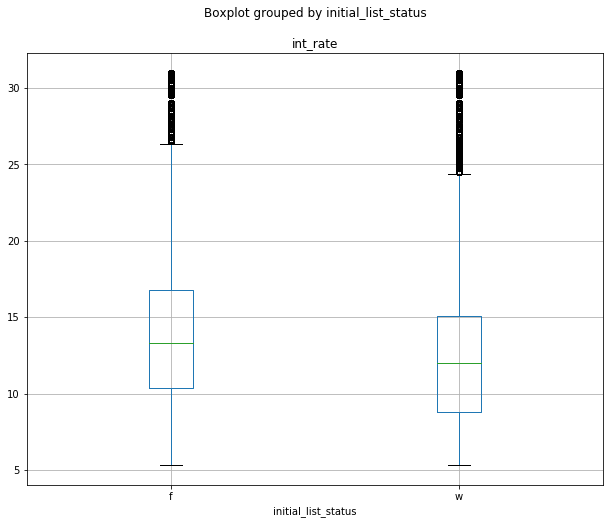

In [11]:
subcategoryANOVA(df,'initial_list_status','int_rate')

In [12]:
subcategoryttest(df,'loan_status','Fully Paid','Default','int_rate')

Ttest_indResult(statistic=-280.6804164896203, pvalue=0.0)

In [13]:
df.to_csv('lean_df_4.csv')